In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_credit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import timeit
from scipy.stats import shapiro
import re
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [38]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale,minmax_scale,robust_scale
import statsmodels.formula.api as smf
from statsmodels.api import Logit
from scipy import stats
from statsmodels.api import qqplot,add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline
matplotlib.rc('font',family='NanumGothic')

In [39]:
plt.rcParams['axes.unicode_minus']=False

In [40]:
jeju_sales = pd.read_csv('jeju_sales.csv')

In [41]:
jeju_sales.head()

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000


In [42]:
aa = jeju_sales.groupby('customer_id').agg({'purchase_amt' : 'sum'})

In [43]:
aa

,purchase_amt
customer_id,
C118113,99500
C118291,1062850
C118294,165000
C118295,107600
C118298,526090
...,...
C704198,49850
C704239,18900
C704271,43800


In [44]:
jeju_member = pd.read_csv('jeju_member.csv')

In [9]:
jeju_revenue = jeju_sales.groupby('customer_id').agg({'purchase_amt':'sum'})

In [10]:
jeju_revenue['purchase_amt'].sum()

1542182095

In [11]:
jeju_revenue

,purchase_amt
customer_id,
C118113,99500
C118291,1062850
C118294,165000
C118295,107600
C118298,526090
...,...
C704198,49850
C704239,18900
C704271,43800


In [12]:
jeju_customer_id = jeju_member[['customer_id','agegroup']]

In [13]:
jeju_customer_id

,customer_id,agegroup
0,C102666,40대
1,C118113,40대
2,C118133,30대
3,C118278,40대
4,C118280,60대
...,...,...
6008,C705804,50대
6009,C706457,20대
6010,C707942,30대
6011,C707954,30대


In [14]:
jeju_revenue

,purchase_amt
customer_id,
C118113,99500
C118291,1062850
C118294,165000
C118295,107600
C118298,526090
...,...
C704198,49850
C704239,18900
C704271,43800


In [15]:
jeju_revenue_age = pd.merge(jeju_customer_id, jeju_revenue, on = ['customer_id'], how = 'left')

In [16]:
jeju_revenue_age

,customer_id,agegroup,purchase_amt
0,C102666,40대,NaN
1,C118113,40대,99500.0
2,C118133,30대,NaN
3,C118278,40대,NaN
4,C118280,60대,NaN
...,...,...,...
6008,C705804,50대,NaN
6009,C706457,20대,NaN
6010,C707942,30대,NaN
6011,C707954,30대,NaN


In [17]:
jeju_revenue_age['purchase_amt'].sum()

1542182095.0

In [18]:
jeju_revenue_age.isnull().sum()

customer_id        0
agegroup           0
purchase_amt    3258
dtype: int64

In [19]:
jeju_revenue

,purchase_amt
customer_id,
C118113,99500
C118291,1062850
C118294,165000
C118295,107600
C118298,526090
...,...
C704198,49850
C704239,18900
C704271,43800


In [21]:
a = jeju_revenue_age.groupby('agegroup').agg({'purchase_amt' :'sum'})

In [22]:
matplotlib.font_manager._rebuild()

<BarContainer object of 8 artists>

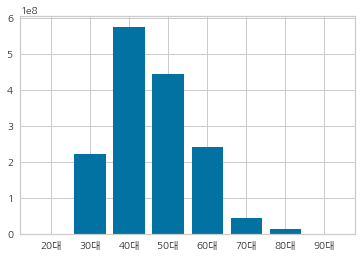

In [23]:
plt.bar(a.index,a['purchase_amt'])()

In [82]:
a['purchase_amt'].sum()

1542182095.0

In [24]:
jeju_sales

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273317,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,1,15700,15700
273318,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P08010301,간식,과자,한과/유과,차례상약과(350g/10개),1,8800,8800
273319,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P06040300,축산물,유제품,아이스크림,유기농아이스크림(기본형),1,8900,8900
273320,C705016,C705016_20191229_51,서귀포매장,2019M12,일요일,14,2019-12-29,:0:14:53:30,2019-12-29,P08040137,간식,빵,빵,쌀로만든잉글리쉬머핀(66g×4개)/매장,1,3900,3900


In [30]:
jeju_offline_jeju1 = jeju_sales[jeju_sales['store_id'].str.contains('매장')]

In [37]:
jeju_offline_jeju1.head()

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000


In [38]:
jeju_market_2018 = jeju_offline_jeju1[jeju_offline_jeju1['purchase_yearmonth'].str.contains('2018')]

In [41]:
jeju_market_2018_rfm = jeju_market_2018.groupby('customer_id').agg({'purchase_id' : 'count', 'purchase_amt':'sum'})

In [45]:
jeju_market_2018_rfm['객단가'] = (jeju_market_2018_rfm['purchase_amt'] / jeju_market_2018_rfm['purchase_id']).round(3)

In [46]:
jeju_market_2018_rfm

,purchase_id,purchase_amt,객단가
customer_id,,,
C118113,9,99500,11055.556
C118291,78,541300,6939.744
C118294,6,45150,7525.000
C118295,11,81700,7427.273
C118298,60,214990,3583.167
...,...,...,...
C643252,2,13400,6700.000
C643700,11,48750,4431.818
C644185,20,68990,3449.500


In [50]:
jeju_market_2018_rfm_grade = pd.merge(jeju_market_2018_rfm, jeju_member[['customer_id','customer_grade']], on ='customer_id', how = 'left')

In [51]:
jeju_market_2018_rfm_grade

,customer_id,purchase_id,purchase_amt,객단가,customer_grade
0,C118113,9,99500,11055.556,3Gold
1,C118291,78,541300,6939.744,1Royal
2,C118294,6,45150,7525.000,2Platinum
3,C118295,11,81700,7427.273,3Gold
4,C118298,60,214990,3583.167,2Platinum
...,...,...,...,...,...
1994,C643252,2,13400,6700.000,3Gold
1995,C643700,11,48750,4431.818,2Platinum
1996,C644185,20,68990,3449.500,2Platinum
1997,C644507,14,83700,5978.571,3Gold


In [52]:
jeju_plot_rfmgrade = jeju_market_2018_rfm_grade.groupby('customer_grade').agg({'purchase_amt' : 'sum', '객단가' :'mean'})

In [53]:
jeju_plot_rfmgrade

,purchase_amt,객단가
customer_grade,,
1Royal,215497462,6326.913884
2Platinum,327550447,5933.460441
3Gold,215418115,5974.038328
4Silver,12852020,5787.247094


<BarContainer object of 4 artists>

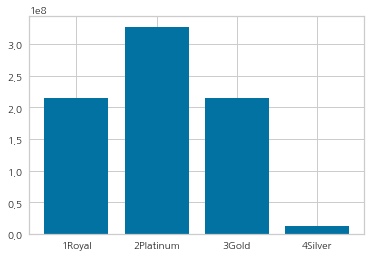

In [57]:
plt.bar(jeju_plot_rfmgrade.index, jeju_plot_rfmgrade['purchase_amt'])

<AxesSubplot:xlabel='customer_grade'>

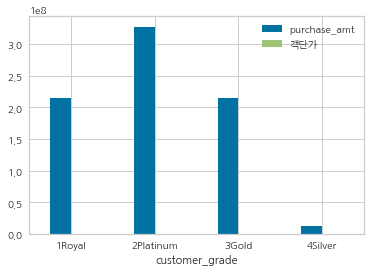

In [69]:
jeju_plot_rfmgrade.plot.bar(rot = 0)

<BarContainer object of 4 artists>

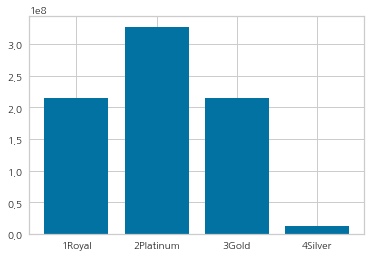

In [76]:
plt.bar(jeju_plot_rfmgrade.index,jeju_plot_rfmgrade['purchase_amt'])

In [155]:
jeju_market_ahn = pd.read_csv('jeju_sales_off.csv', encoding = 'cp949')

In [156]:
jeju_market_ahn.shape

(247844, 18)

In [233]:
jeju_market_ahn = pd.read_csv('jeju_sales_off.csv', encoding = 'cp949')
jeju_market_2018 = jeju_market_ahn[jeju_market_ahn['purchase_yearmonth'].str.contains('2018')]
jeju_market_2018_rfm = jeju_market_2018.groupby('customer_id').agg({'purchase_id' : 'count', 'purchase_amt':'sum'})
jeju_market_2018_rfm_grade = pd.merge(jeju_market_2018_rfm, jeju_member[['customer_id','customer_grade']], on ='customer_id', how = 'left')
jeju_2018_rfmgrade = jeju_market_2018_rfm_grade.groupby('customer_grade').agg({'purchase_amt' : 'sum', 'customer_id' :'count'})

In [45]:
jeju_market_ahn = pd.read_csv('jeju_sales_off.csv', encoding = 'cp949')
jeju_market_2019 = jeju_market_ahn[jeju_market_ahn['purchase_yearmonth'].str.contains('2019')]
jeju_market_2019_rfm = jeju_market_2019.groupby('customer_id').agg({'purchase_id' : 'count', 'purchase_amt':'sum','purchase_id':'count'})
jeju_market_2019_rfm_grade = pd.merge(jeju_market_2019_rfm, jeju_member[['customer_id','customer_grade']], on ='customer_id', how = 'left')
jeju_2019_rfmgrade = jeju_market_2019_rfm_grade.groupby('customer_grade').agg({'purchase_amt' : 'sum', 'customer_id' :'count'})

In [232]:
jeju_2019_rfmgrade

,purchase_amt,customer_id
customer_grade,,
1Royal,155041250,86
2Platinum,258152161,690
3Gold,177198450,1263
4Silver,8867145,235


In [229]:
jeju_2019_rfmgrade

,purchase_amt,객단가
customer_grade,,
1Royal,155041250,6463.579465
2Platinum,258152161,6109.986523
3Gold,177198450,6399.845215
4Silver,8867145,6104.778102


2018의 총 매출 :  771106074
2019의 총 매출 :  599259006


<AxesSubplot:xlabel='customer_grade'>

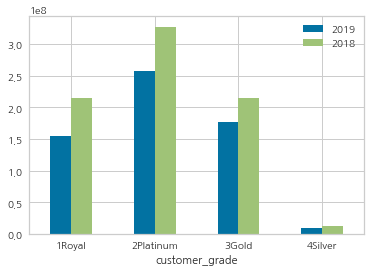

In [234]:
jeju_market_purchase = jeju_2019_rfmgrade.drop('customer_id', axis =1, inplace = False)
jeju_market_purchase['2018'] =jeju_2018_rfmgrade[['purchase_amt']]
jeju_market_purchase.rename(columns={'purchase_amt' : '2019'}, inplace = True)
print('2018의 총 매출 : ',jeju_market_purchase['2018'].sum())
print('2019의 총 매출 : ',jeju_market_purchase['2019'].sum())
jeju_market_purchase.plot.bar(rot = 0)

In [34]:
771106074+599259006

1370365080

In [54]:
jeju_2019_rfmgrade

,purchase_amt,customer_id,dangga
customer_grade,,,
1Royal,155041250,86,1802805.233
2Platinum,258152161,690,374133.567
3Gold,177198450,1263,140299.644
4Silver,8867145,235,37732.532


In [241]:
len(set(jeju_market_2019['customer_id']))

2274

<AxesSubplot:xlabel='customer_grade'>

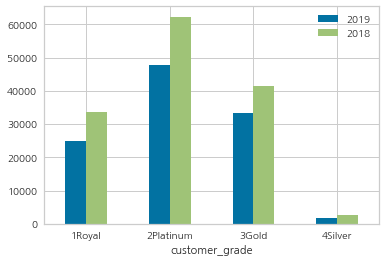

In [201]:
jeju_cusnum = pd.merge(jeju_2019_cusnum,jeju_2018_cusnum, left_index = True, right_index = True, how = 'left')
jeju_cusnum.rename(columns={'purchase_id_x' : '2019', 'purchase_id_y' : '2018'}, inplace = True)
jeju_cusnum.plot.bar(rot = 0)

In [203]:
jeju_2019_gradenum = jeju_market_2019_rfm_grade.groupby('customer_grade').agg({'customer_id' : 'count'})
jeju_2018_gradenum = jeju_market_2018_rfm_grade.groupby('customer_grade').agg({'customer_id' : 'count'})

In [208]:
jeju_2018_gradenum.sum()

customer_id    1999
dtype: int64

In [49]:
jeju_market_ahn = pd.read_csv('jeju_sales_off.csv', encoding = 'cp949')
jeju_market_2019 = jeju_market_ahn[jeju_market_ahn['purchase_yearmonth'].str.contains('2019')]
jeju_market_2019_rfm = jeju_market_2019.groupby('customer_id').agg({'purchase_id' : 'count', 'purchase_amt':'sum','purchase_id':'count'})
jeju_market_2019_rfm_grade = pd.merge(jeju_market_2019_rfm, jeju_member[['customer_id','customer_grade']], on ='customer_id', how = 'left')
jeju_2019_rfmgrade = jeju_market_2019_rfm_grade.groupby('customer_grade').agg({'purchase_amt' : 'sum', 'customer_id' :'count'})
jeju_2019_rfmgrade

,purchase_amt,customer_id
customer_grade,,
1Royal,155041250,86
2Platinum,258152161,690
3Gold,177198450,1263
4Silver,8867145,235


In [51]:
jeju_2019_rfmgrade['dangga'] = (jeju_2019_rfmgrade['purchase_amt'] / jeju_2019_rfmgrade['customer_id']).round(3)
jeju_2019_rfmgrade

,purchase_amt,customer_id,dangga
customer_grade,,,
1Royal,155041250,86,1802805.233
2Platinum,258152161,690,374133.567
3Gold,177198450,1263,140299.644
4Silver,8867145,235,37732.532


<AxesSubplot:xlabel='customer_grade'>

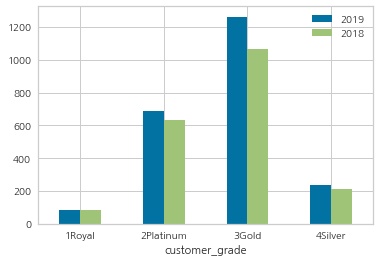

In [205]:
jeju_gradenum = pd.merge(jeju_2019_gradenum,jeju_2018_gradenum, left_index = True, right_index = True, how = 'left')
jeju_gradenum.rename(columns={'customer_id_x' : '2019', 'customer_id_y' : '2018'}, inplace = True)
jeju_gradenum.plot.bar(rot = 0)

In [271]:
jeju_cusnum

,2019,2018
customer_grade,,
1Royal,24969,33542
2Platinum,47756,62315
3Gold,33436,41458
4Silver,1724,2644


Text(0.5, 1.0, '구매 인원 중 등급별 회원 수 현황')

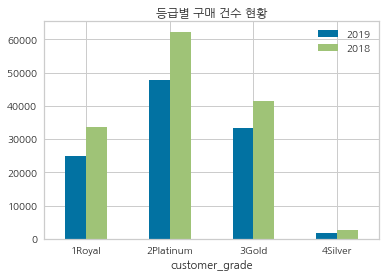

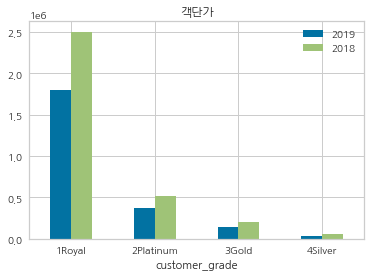

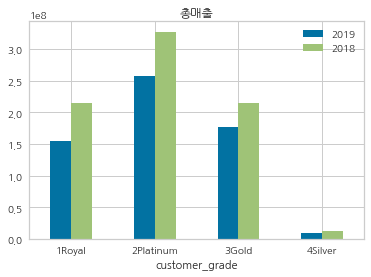

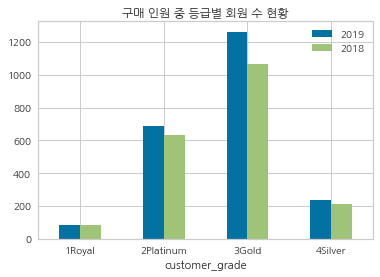

In [251]:

jeju_cusnum.plot.bar(rot = 0)
plt.title('등급별 구매 건수 현황')
jeju_market_cal.plot.bar(rot = 0)
plt.title('객단가')
jeju_market_purchase.plot.bar(rot = 0)
plt.title('총매출')
jeju_gradenum.plot.bar(rot = 0)
plt.title('구매 인원 중 등급별 회원 수 현황')

# 오프라인 매장 분석 결과

In [472]:
jeju_market_cal['감소율'] = ((jeju_market_cal['2018'] - jeju_market_cal['2019']) / jeju_market_cal['2018']).round(3)
jeju_market_cal

,2019,2018,감소율
customer_grade,,,
1Royal,1.802805e+06,2.504501e+06,0.280
2Platinum,3.741336e+05,5.189363e+05,0.279
3Gold,1.402996e+05,2.015137e+05,0.304
4Silver,3.773253e+04,6.033812e+04,0.375


# 오프라인 객단가 감소률 

In [268]:
jeju_gradenum

,2019,2018
customer_grade,,
1Royal,86,86
2Platinum,690,631
3Gold,1263,1069
4Silver,235,213


In [267]:
jeju_member.groupby('customer_grade').agg({'customer_id':'count'})

,customer_id
customer_grade,
1Royal,103
2Platinum,982
3Gold,2538
4Silver,2390


In [484]:
jeju_market_ahn1 = pd.read_csv('jeju_sales_on.csv', encoding = 'cp949')
jeju_on_2018 = jeju_market_ahn1[jeju_market_ahn1['purchase_yearmonth'].str.contains('2018')]
jeju_on_2018_rfm = jeju_on_2018.groupby('customer_id').agg({'purchase_id' : 'count', 'purchase_amt':'sum'})
jeju_on_2018_rfm_grade = pd.merge(jeju_on_2018_rfm, jeju_member[['customer_id','customer_grade']], on ='customer_id', how = 'left')
jeju_2018_onrfmgrade = jeju_on_2018_rfm_grade.groupby('customer_grade').agg({'purchase_amt' : 'sum', 'customer_id' :'count'})
 
jeju_on_2019 = jeju_market_ahn1[jeju_market_ahn1['purchase_yearmonth'].str.contains('2019')]
jeju_on_2019_rfm = jeju_on_2019.groupby('customer_id').agg({'purchase_id' : 'count', 'purchase_amt':'sum','purchase_id':'count'})
jeju_on_2019_rfm_grade = pd.merge(jeju_on_2019_rfm, jeju_member[['customer_id','customer_grade']], on ='customer_id', how = 'left')
jeju_2019_onrfmgrade =jeju_on_2019_rfm_grade.groupby('customer_grade').agg({'purchase_amt' : 'sum', 'customer_id' :'count'})

2018의 총 매출 :  87400960
2019의 총 매출 :  84013940


<AxesSubplot:xlabel='customer_grade'>

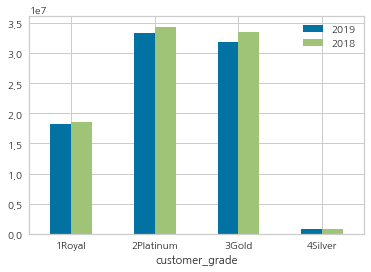

In [256]:
jeju_on_purchase = jeju_2019_onrfmgrade.drop('customer_id', axis =1, inplace = False)
jeju_on_purchase['2018'] =jeju_2018_onrfmgrade[['purchase_amt']]
jeju_on_purchase.rename(columns={'purchase_amt' : '2019'}, inplace = True)
print('2018의 총 매출 : ',jeju_on_purchase['2018'].sum())
print('2019의 총 매출 : ',jeju_on_purchase['2019'].sum())
jeju_on_purchase.plot.bar(rot = 0)

In [490]:
clear(jeju_on_call)

In [499]:
jeju_on_cal

<AxesSubplot:xlabel='customer_grade'>

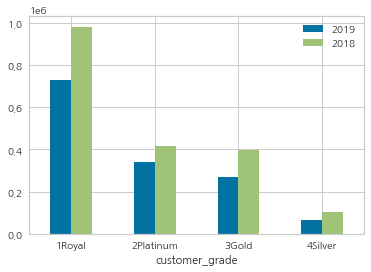

In [501]:
jeju_on_cal = pd.DataFrame()
jeju_on_cal['2019'] = jeju_2019_onrfmgrade['purchase_amt'] / jeju_2019_onrfmgrade['customer_id']
jeju_on_cal['2018'] = jeju_2018_onrfmgrade['purchase_amt'] / jeju_2018_onrfmgrade['customer_id']
jeju_on_cal.index = jeju_2019_onrfmgrade.index
jeju_on_cal.plot.bar(rot = 0)

In [502]:
jeju_on_cal['감소율'] = ((jeju_on_cal['2018'] - jeju_on_cal['2019']) / jeju_on_cal['2018']).round(3)
jeju_on_cal

,2019,2018,감소율
customer_grade,,,
1Royal,728518.000000,980105.263158,0.257
2Platinum,339532.244898,414349.397590,0.181
3Gold,269550.254237,394767.176471,0.317
4Silver,65445.454545,104093.750000,0.371


# 온라인 객단가 감소율 현황

In [274]:
jeju_on_2019_rfm_grade

,customer_id,purchase_id,purchase_amt,customer_grade
0,C118476,2,147400,3Gold
1,C121449,316,2273650,1Royal
2,C123755,16,202600,2Platinum
3,C126070,467,2328750,1Royal
4,C127803,23,423300,3Gold
...,...,...,...,...
247,C701955,5,107600,3Gold
248,C701957,12,1133700,3Gold
249,C701961,5,76800,3Gold
250,C701970,2,23500,3Gold


<AxesSubplot:xlabel='customer_grade'>

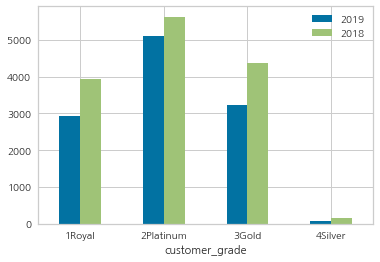

In [275]:
jeju_2019_oncusnum = jeju_on_2019_rfm_grade.groupby('customer_grade').agg({'purchase_id' : 'sum'})
jeju_2018_oncusnum = jeju_on_2018_rfm_grade.groupby('customer_grade').agg({'purchase_id' : 'sum'})

jeju_oncusnum = pd.merge(jeju_2019_oncusnum,jeju_2018_oncusnum, left_index = True, right_index = True, how = 'left')
jeju_oncusnum.rename(columns={'purchase_id_x' : '2019', 'purchase_id_y' : '2018'}, inplace = True)
jeju_oncusnum.plot.bar(rot = 0)

In [276]:
jeju_on_2019_rfm_grade

,customer_id,purchase_id,purchase_amt,customer_grade
0,C118476,2,147400,3Gold
1,C121449,316,2273650,1Royal
2,C123755,16,202600,2Platinum
3,C126070,467,2328750,1Royal
4,C127803,23,423300,3Gold
...,...,...,...,...
247,C701955,5,107600,3Gold
248,C701957,12,1133700,3Gold
249,C701961,5,76800,3Gold
250,C701970,2,23500,3Gold


<AxesSubplot:xlabel='customer_grade'>

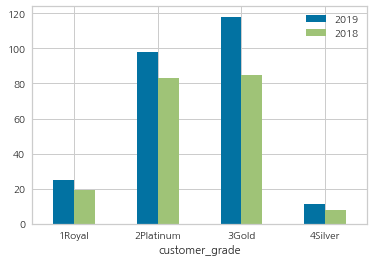

In [277]:
jeju_2019_ongradenum = jeju_on_2019_rfm_grade.groupby('customer_grade').agg({'customer_id' : 'count'})
jeju_2018_ongradenum = jeju_on_2018_rfm_grade.groupby('customer_grade').agg({'customer_id' : 'count'})

jeju_ongradenum = pd.merge(jeju_2019_ongradenum,jeju_2018_ongradenum, left_index = True, right_index = True, how = 'left')
jeju_ongradenum.rename(columns={'customer_id_x' : '2019', 'customer_id_y' : '2018'}, inplace = True)
jeju_ongradenum.plot.bar(rot = 0)

Text(0.5, 1.0, '구매 인원 중 등급별 회원 수 현황')

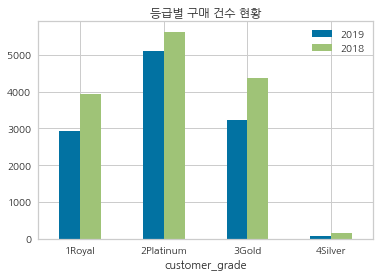

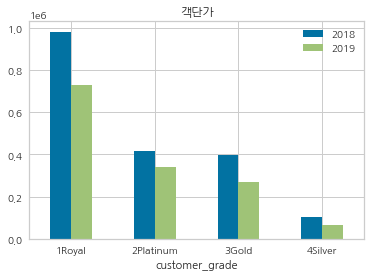

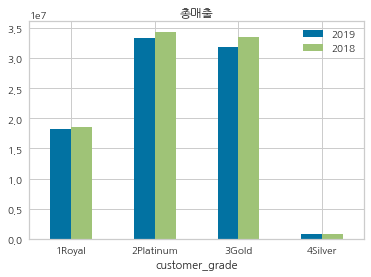

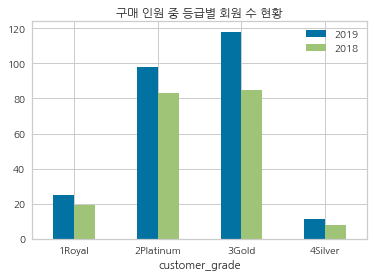

In [278]:

jeju_oncusnum.plot.bar(rot = 0)
plt.title('등급별 구매 건수 현황')
jeju_on_cal.plot.bar(rot = 0)
plt.title('객단가')
jeju_on_purchase.plot.bar(rot = 0)
plt.title('총매출')
jeju_ongradenum.plot.bar(rot = 0)
plt.title('구매 인원 중 등급별 회원 수 현황')

# 온라인 매장 분석 결과

In [307]:
jeju_filter = jeju_member.groupby(['customer_grade','agegroup']).agg({'customer_id':'count'})

In [529]:
jeju_pivot

,customer_grade,agegroup,customer_id
0,1Royal,30대,7
1,1Royal,40대,29
2,1Royal,50대,40
3,1Royal,60대,22
4,1Royal,70대,2
5,1Royal,80대,3
6,2Platinum,20대,2
7,2Platinum,30대,138
8,2Platinum,40대,404
9,2Platinum,50대,261


In [325]:
jeju_pivot_final = jeju_pivot.pivot(index ='customer_grade', columns = 'agegroup')

In [329]:
jeju_pivot_final.fillna(0, inplace = True)

In [332]:
jeju_pivot_final

customer_id                                              
agegroup               20대    30대     40대    50대    60대   70대   80대  90대
customer_grade                                                          
1Royal                 0.0    7.0    29.0   40.0   22.0   2.0   3.0  0.0
2Platinum              2.0  138.0   404.0  261.0  141.0  30.0   6.0  0.0
3Gold                  7.0  474.0  1106.0  627.0  238.0  65.0  20.0  1.0
4Silver               11.0  550.0   980.0  551.0  235.0  54.0   9.0  0.0

In [331]:
jeju_pivot_final.columns

MultiIndex([('customer_id', '20대'),
            ('customer_id', '30대'),
            ('customer_id', '40대'),
            ('customer_id', '50대'),
            ('customer_id', '60대'),
            ('customer_id', '70대'),
            ('customer_id', '80대'),
            ('customer_id', '90대')],
           names=[None, 'agegroup'])

In [333]:
jeju_pivot_final[('customer_id','sum')] = jeju_pivot_final.sum(axis = 1)

In [334]:
jeju_pivot_final

customer_id                                                \
agegroup               20대    30대     40대    50대    60대   70대   80대  90대   
customer_grade                                                             
1Royal                 0.0    7.0    29.0   40.0   22.0   2.0   3.0  0.0   
2Platinum              2.0  138.0   404.0  261.0  141.0  30.0   6.0  0.0   
3Gold                  7.0  474.0  1106.0  627.0  238.0  65.0  20.0  1.0   
4Silver               11.0  550.0   980.0  551.0  235.0  54.0   9.0  0.0   

                        
agegroup           sum  
customer_grade          
1Royal           103.0  
2Platinum        982.0  
3Gold           2538.0  
4Silver         2390.0

In [369]:
pd.concat([jeju_pivot_final, temp])

customer_id                                                         
agegroup          20대     30대     40대     50대    60대    70대   80대  90대     sum
1Royal            0.0     7.0    29.0    40.0   22.0    2.0   3.0  0.0   103.0
2Platinum         2.0   138.0   404.0   261.0  141.0   30.0   6.0  0.0   982.0
3Gold             7.0   474.0  1106.0   627.0  238.0   65.0  20.0  1.0  2538.0
4Silver          11.0   550.0   980.0   551.0  235.0   54.0   9.0  0.0  2390.0
0                20.0  1169.0  2519.0  1479.0  636.0  151.0  38.0  1.0  6013.0

# 등급 연령별 분포 현황

In [359]:
temp = pd.DataFrame(jeju_pivot_final.sum(axis = 0)).T

In [391]:
jeju_on_2018_rfm_grade[jeju_on_2018_rfm_grade['customer_grade'] == '1Royal']['purchase_amt'].min()

51950

In [398]:
jeju_3Gold = jeju_on_2018_rfm_grade[jeju_on_2018_rfm_grade['customer_grade'] == '3Gold']
jeju_2Platinum = jeju_on_2018_rfm_grade[jeju_on_2018_rfm_grade['customer_grade'] == '2Platinum']
print(jeju_2Platinum[jeju_2Platinum['purchase_amt'] > 51950].shape[0])
print(jeju_3Gold[jeju_3Gold['purchase_amt'] > 51950].shape[0])


62
55


In [399]:
jeju_on_2018_rfm_grade[jeju_on_2018_rfm_grade['customer_grade'] == '2Platinum']['purchase_amt'].min()

10200

In [406]:
jeju_on_2018_rfm_grade[(jeju_on_2018_rfm_grade['customer_grade'] == '2Platinum') &(jeju_on_2018_rfm_grade['purchase_amt'] > 10200)].shape[0]

82

In [400]:
print(jeju_2Platinum[jeju_2Platinum['purchase_amt'] > 10200].shape[0])
print(jeju_3Gold[jeju_3Gold['purchase_amt'] > 10200].shape[0])

82
80


In [401]:
jeju_on_2018_rfm_grade[jeju_on_2018_rfm_grade['customer_grade'] == '2Platinum']['purchase_amt']

2       25400
7      632150
9      114000
15      98450
17      88900
        ...  
186    616050
189    390550
190    104150
192     54700
193    117400
Name: purchase_amt, Length: 83, dtype: int64

In [422]:
jeju_on_2018_rfm_grade

,customer_id,purchase_id,purchase_amt,customer_grade,grade_num
0,C121449,41,611050,1Royal,1
1,C121524,29,212450,3Gold,3
2,C123755,6,25400,2Platinum,2
3,C126070,757,3452800,1Royal,1
4,C127803,48,480350,3Gold,3
...,...,...,...,...,...
190,C637439,19,104150,2Platinum,2
191,C639319,2,5950,3Gold,3
192,C639675,7,54700,2Platinum,2
193,C643361,18,117400,2Platinum,2


In [420]:
set(jeju_on_2018_rfm_grade['customer_grade'])

{'1Royal', '2Platinum', '3Gold', '4Silver'}

In [458]:
jeju_2018_onrfmgrade

,purchase_amt,customer_id
customer_grade,,
1Royal,18622000,19
2Platinum,34391000,83
3Gold,33555210,85
4Silver,832750,8


In [461]:
min_val = []; count_royal=[]; count_plat=[]; count_gold=[]; count_silver=[]
set_temp = ['1Royal', '2Platinum', '3Gold', '4Silver']
for x in range(len(set_temp)):
    value_temp = jeju_on_2018_rfm_grade[jeju_on_2018_rfm_grade['customer_grade'] == set_temp[x]]['purchase_amt'].min()
    min_val.append(value_temp)
for x in range(len(set_temp)):
    count_royal.append(jeju_on_2018_rfm_grade[(jeju_on_2018_rfm_grade['customer_grade'] == '1Royal') & (jeju_on_2018_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_plat.append(jeju_on_2018_rfm_grade[(jeju_on_2018_rfm_grade['customer_grade'] == '2Platinum') & (jeju_on_2018_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_gold.append(jeju_on_2018_rfm_grade[(jeju_on_2018_rfm_grade['customer_grade'] == '3Gold') & (jeju_on_2018_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_silver.append(jeju_on_2018_rfm_grade[(jeju_on_2018_rfm_grade['customer_grade'] == '4Silver') & (jeju_on_2018_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    
    
grade_analysis_2018on=pd.DataFrame()
grade_analysis_2018on['min_values'] = min_val
grade_analysis_2018on['1Royal'] = count_royal
grade_analysis_2018on['2Platinum'] = count_plat
grade_analysis_2018on['3Gold'] = count_gold
grade_analysis_2018on['4Silver'] = count_silver
grade_analysis_2018on.index = list(set_temp)
grade_analysis_2018on

,min_values,1Royal,2Platinum,3Gold,4Silver
1Royal,51950,19,62,55,5
2Platinum,10200,19,83,80,8
3Gold,1950,19,83,85,8
4Silver,14200,19,82,78,8


# 온라인 2018 등급별 소비 최소값(min_value)을 초과한 다른 등급 인원 수 현황

In [463]:
min_val = []; count_royal=[]; count_plat=[]; count_gold=[]; count_silver=[]
set_temp = ['1Royal', '2Platinum', '3Gold', '4Silver']
for x in range(len(set_temp)):
    value_temp = jeju_on_2019_rfm_grade[jeju_on_2019_rfm_grade['customer_grade'] == set_temp[x]]['purchase_amt'].min()
    min_val.append(value_temp)
for x in range(len(set_temp)):
    count_royal.append(jeju_on_2019_rfm_grade[(jeju_on_2019_rfm_grade['customer_grade'] == '1Royal') & (jeju_on_2019_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_plat.append(jeju_on_2019_rfm_grade[(jeju_on_2019_rfm_grade['customer_grade'] == '2Platinum') & (jeju_on_2019_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_gold.append(jeju_on_2019_rfm_grade[(jeju_on_2019_rfm_grade['customer_grade'] == '3Gold') & (jeju_on_2019_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_silver.append(jeju_on_2019_rfm_grade[(jeju_on_2019_rfm_grade['customer_grade'] == '4Silver') & (jeju_on_2019_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    
    
grade_analysis_2019on=pd.DataFrame()
grade_analysis_2019on['min_values'] = min_val
grade_analysis_2019on['1Royal'] = count_royal
grade_analysis_2019on['2Platinum'] = count_plat
grade_analysis_2019on['3Gold'] = count_gold
grade_analysis_2019on['4Silver'] = count_silver
grade_analysis_2019on.index = list(set_temp)
grade_analysis_2019on

,min_values,1Royal,2Platinum,3Gold,4Silver
1Royal,19900,25,91,106,8
2Platinum,4000,25,98,115,11
3Gold,2300,25,98,118,11
4Silver,13000,25,94,110,11


# 온라인 2019 등급별 소비 최소값(min_value)을 초과한 다른 등급 인원 수 현황

In [29]:
min_val = []; count_royal=[]; count_plat=[]; count_gold=[]; count_silver=[]
set_temp = ['1Royal', '2Platinum', '3Gold', '4Silver']
for x in range(len(set_temp)):
    value_temp = jeju_market_2018_rfm_grade[jeju_market_2018_rfm_grade['customer_grade'] == set_temp[x]]['purchase_amt'].min()
    min_val.append(value_temp)
for x in range(len(set_temp)):
    count_royal.append(jeju_market_2018_rfm_grade[(jeju_market_2018_rfm_grade['customer_grade'] == '1Royal') & (jeju_market_2018_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_plat.append(jeju_market_2018_rfm_grade[(jeju_market_201jeju_total = jeju_ahn.groupby('customer_id').agg({'purchase_amt':'sum'})
jeju_total[['purchase_amt']].boxplot()8_rfm_grade['customer_grade'] == '2Platinum') & (jeju_market_2018_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_gold.append(jeju_market_2018_rfm_grade[(jeju_market_2018_rfm_grade['customer_grade'] == '3Gold') & (jeju_market_2018_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_silver.append(jeju_market_2018_rfm_grade[(jeju_market_2018_rfm_grade['customer_grade'] == '4Silver') & (jeju_market_2018_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    
    
grade_analysis_2018off=pd.DataFrame()
grade_analysis_2018off['min_values'] = min_val
grade_analysis_2018off['1Royal'] = count_royal
grade_analysis_2018off['2Platinum'] = count_plat
grade_analysis_2018off['3Gold'] = count_gold
grade_analysis_2018off['4Silver'] = count_silver
grade_analysis_2018off.index = list(set_temp)
grade_analysis_2018off

NameError: name 'jeju_market_2018_rfm_grade' is not defined

# 오프라인 2018 등급별 소비 최소값(min_value)을 초과한 다른 등급 인원 수 현황

In [465]:
min_val = []; count_royal=[]; count_plat=[]; count_gold=[]; count_silver=[]
set_temp = ['1Royal', '2Platinum', '3Gold', '4Silver']
for x in range(len(set_temp)):
    value_temp = jeju_market_2019_rfm_grade[jeju_market_2019_rfm_grade['customer_grade'] == set_temp[x]]['purchase_amt'].min()
    min_val.append(value_temp)
for x in range(len(set_temp)):
    count_royal.append(jeju_market_2019_rfm_grade[(jeju_market_2019_rfm_grade['customer_grade'] == '1Royal') & (jeju_market_2019_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_plat.append(jeju_market_2019_rfm_grade[(jeju_market_2019_rfm_grade['customer_grade'] == '2Platinum') & (jeju_market_2019_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_gold.append(jeju_market_2019_rfm_grade[(jeju_market_2019_rfm_grade['customer_grade'] == '3Gold') & (jeju_market_2019_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    count_silver.append(jeju_market_2019_rfm_grade[(jeju_market_2019_rfm_grade['customer_grade'] == '4Silver') & (jeju_market_2019_rfm_grade['purchase_amt'] >= min_val[x])].shape[0])
    
    
grade_analysis_2019off=pd.DataFrame()
grade_analysis_2019off['min_values'] = min_val
grade_analysis_2019off['1Royal'] = count_royal
grade_analysis_2019off['2Platinum'] = count_plat
grade_analysis_2019off['3Gold'] = count_gold
grade_analysis_2019off['4Silver'] = count_silver
grade_analysis_2019off.index = list(set_temp)
grade_analysis_2019off

,min_values,1Royal,2Platinum,3Gold,4Silver
1Royal,8000,86,675,1130,165
2Platinum,1300,86,690,1263,232
3Gold,1300,86,690,1263,232
4Silver,1000,86,690,1263,235


# 오프라인 2019 등급별 소비 최소값(min_value)을 초과한 다른 등급 인원 수 현황

In [526]:
len(set(jeju_market_ahn1['item_g_m']))

38

In [519]:
jeju_total = jeju_ahn.groupby('customer_id').agg({'purchase_amt':'sum'})
jeju_total[['purchase_amt']].boxplot()jeju_total = jeju_ahn.groupby('customer_id').agg({'purchase_amt':'sum'})
jeju_total[['purchase_amt']].boxplot()jeju_total = jeju_ahn.groupby('customer_id').agg({'purchase_amt':'sum'})
jeju_total[['purchase_amt']].boxplot()item_m = ['가루', '과일채소', '과자', '기름/식초', '김장채소', '김치', '꿀', '닭', '돼지', '두부/유부', '떡', '말린나물/건재', '멥쌀', '밀가공',
 '밑반찬', '버섯', '빵', '뿌리채소', '소금', '소스/기타양념', '식사대용', '쌈채소류', '양념채소', '어묵/묵', '열매채소', '오리', '유정란',
 '유제품', '육가공', '잎/줄기채소', '잎채소', '장', '잼/병조림/기타', '절임/장아찌', '즉석조리', '찹쌀', '특용작물', '한우']

In [521]:
jeju_market_ahn1.head()

,Unnamed: 0,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt
0,446,C118476,C118476_20190109_201,전화,2019M01,수요일,10,2019-01-09,:0:10:59:58,2019-02-21,P09040401,양념/가루,장,메주,메주(1말:약6-7kg:솔뫼),1,98000,98000
1,457,C118476,C118476_20190919_180,전화,2019M09,목요일,0,2019-09-19,:0:00:00:00,2019-11-21,P05060500,채소,김장채소,절임배추,절임배추(10kg),2,24700,49400
2,1508,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P05010300,채소,잎채소,냉이,냉이(200g),1,3150,3150
3,1509,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P08030700,간식,밀가공,면/기타,당면(500g),1,4800,4800
4,1510,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P05019820,채소,잎채소,콩나물,항아리콩나물(250g)-제주,1,1300,1300


In [527]:
jeju_week = jeju_market_ahn1.groupby(['purchase_weekday','item_g_m']).agg({'purchase_amt' : 'sum', 'purchase_id':'count'})

In [530]:
jeju_week_pivot = jeju_week.reset_index(inplace=False)

In [531]:
jeju_week_pivot

,purchase_weekday,item_g_m,purchase_amt,purchase_id
0,금요일,가루,793800,128
1,금요일,과일채소,651100,78
2,금요일,과자,1117400,401
3,금요일,기름/식초,621600,56
4,금요일,김장채소,855350,16
...,...,...,...,...
252,화요일,절임/장아찌,118400,23
253,화요일,즉석조리,767650,106
254,화요일,찹쌀,742000,62
255,화요일,특용작물,18000,4


In [539]:
jeju_week_pivot_final = jeju_week_pivot.pivot(index ='purchase_weekday', columns = 'item_g_m',values = 'purchase_amt')
jeju_week_pivot_final.fillna(0)

item_g_m,가루,과일채소,과자,기름/식초,김장채소,김치,꿀,닭,돼지,두부/유부,...,육가공,잎/줄기채소,잎채소,장,잼/병조림/기타,절임/장아찌,즉석조리,찹쌀,특용작물,한우
purchase_weekday,,,,,,,,,,,,,,,,,,,,,
금요일,793800.0,651100.0,1117400.0,621600.0,855350.0,150400.0,357800.0,296000.0,652700.0,1005250.0,...,1422780.0,174400.0,1324760.0,558600.0,141400.0,82400.0,174250.0,828600.0,18100.0,815100.0
목요일,523000.0,477600.0,715050.0,545700.0,115700.0,487500.0,319900.0,253300.0,771100.0,1091650.0,...,1171000.0,29200.0,630300.0,1146000.0,144950.0,53700.0,255650.0,384800.0,7200.0,668100.0
수요일,463600.0,581100.0,544050.0,589900.0,170200.0,323500.0,88600.0,328500.0,780900.0,561850.0,...,1368030.0,29600.0,577000.0,1048200.0,146550.0,52400.0,275450.0,232300.0,0.0,711800.0
월요일,4174800.0,1793000.0,1870650.0,1988700.0,1524700.0,455900.0,2237500.0,677700.0,1563280.0,1666600.0,...,2404780.0,216000.0,2029400.0,1875600.0,286050.0,186400.0,475500.0,1385200.0,29050.0,1504100.0
일요일,342100.0,615400.0,395500.0,253700.0,29200.0,92000.0,97000.0,134000.0,364200.0,445000.0,...,1216000.0,36250.0,418700.0,626900.0,98750.0,50500.0,274700.0,263100.0,0.0,495600.0
토요일,190200.0,273400.0,246800.0,126300.0,0.0,262700.0,122300.0,93500.0,137700.0,275600.0,...,496150.0,25000.0,225200.0,286500.0,46200.0,10700.0,49300.0,107400.0,10900.0,147900.0
화요일,972200.0,878000.0,1001800.0,895700.0,674150.0,243000.0,83100.0,684100.0,877880.0,892300.0,...,2492600.0,115450.0,1205330.0,1082500.0,248300.0,118400.0,767650.0,742000.0,18000.0,1421400.0


In [543]:
week_temp1 = pd.DataFrame(jeju_week_pivot_final.sum(axis = 0)).T
pd.concat([jeju_week_pivot_final, week_temp1])

item_g_m,가루,과일채소,과자,기름/식초,김장채소,김치,꿀,닭,돼지,두부/유부,...,육가공,잎/줄기채소,잎채소,장,잼/병조림/기타,절임/장아찌,즉석조리,찹쌀,특용작물,한우
금요일,793800.0,651100.0,1117400.0,621600.0,855350.0,150400.0,357800.0,296000.0,652700.0,1005250.0,...,1422780.0,174400.0,1324760.0,558600.0,141400.0,82400.0,174250.0,828600.0,18100.0,815100.0
목요일,523000.0,477600.0,715050.0,545700.0,115700.0,487500.0,319900.0,253300.0,771100.0,1091650.0,...,1171000.0,29200.0,630300.0,1146000.0,144950.0,53700.0,255650.0,384800.0,7200.0,668100.0
수요일,463600.0,581100.0,544050.0,589900.0,170200.0,323500.0,88600.0,328500.0,780900.0,561850.0,...,1368030.0,29600.0,577000.0,1048200.0,146550.0,52400.0,275450.0,232300.0,NaN,711800.0
월요일,4174800.0,1793000.0,1870650.0,1988700.0,1524700.0,455900.0,2237500.0,677700.0,1563280.0,1666600.0,...,2404780.0,216000.0,2029400.0,1875600.0,286050.0,186400.0,475500.0,1385200.0,29050.0,1504100.0
일요일,342100.0,615400.0,395500.0,253700.0,29200.0,92000.0,97000.0,134000.0,364200.0,445000.0,...,1216000.0,36250.0,418700.0,626900.0,98750.0,50500.0,274700.0,263100.0,NaN,495600.0
토요일,190200.0,273400.0,246800.0,126300.0,NaN,262700.0,122300.0,93500.0,137700.0,275600.0,...,496150.0,25000.0,225200.0,286500.0,46200.0,10700.0,49300.0,107400.0,10900.0,147900.0
화요일,972200.0,878000.0,1001800.0,895700.0,674150.0,243000.0,83100.0,684100.0,877880.0,892300.0,...,2492600.0,115450.0,1205330.0,1082500.0,248300.0,118400.0,767650.0,742000.0,18000.0,1421400.0
0,7459700.0,5269600.0,5891250.0,5021600.0,3369300.0,2015000.0,3306200.0,2467100.0,5147760.0,5938250.0,...,10571340.0,625900.0,6410690.0,6624300.0,1112200.0,554500.0,2272500.0,3943400.0,83250.0,5764000.0


In [538]:
jeju_week_pivot_final_id = jeju_week_pivot.pivot(index ='purchase_weekday', columns = 'item_g_m',values = 'purchase_id')
jeju_week_pivot_final_id.fillna(0)

item_g_m,가루,과일채소,과자,기름/식초,김장채소,김치,꿀,닭,돼지,두부/유부,...,육가공,잎/줄기채소,잎채소,장,잼/병조림/기타,절임/장아찌,즉석조리,찹쌀,특용작물,한우
purchase_weekday,,,,,,,,,,,,,,,,,,,,,
금요일,128.0,78.0,401.0,56.0,16.0,12.0,13.0,39.0,73.0,302.0,...,209.0,37.0,420.0,36.0,20.0,27.0,28.0,75.0,4.0,33.0
목요일,88.0,50.0,186.0,54.0,7.0,13.0,13.0,30.0,92.0,269.0,...,142.0,13.0,255.0,90.0,26.0,17.0,41.0,40.0,2.0,30.0
수요일,85.0,62.0,188.0,54.0,4.0,9.0,5.0,42.0,80.0,192.0,...,148.0,13.0,240.0,47.0,30.0,17.0,39.0,18.0,0.0,37.0
월요일,227.0,170.0,462.0,147.0,34.0,41.0,31.0,66.0,169.0,557.0,...,279.0,71.0,780.0,113.0,51.0,53.0,73.0,121.0,6.0,69.0
일요일,43.0,63.0,129.0,23.0,1.0,12.0,4.0,17.0,40.0,150.0,...,124.0,13.0,185.0,42.0,13.0,14.0,36.0,22.0,0.0,23.0
토요일,28.0,27.0,77.0,12.0,0.0,9.0,5.0,9.0,20.0,76.0,...,56.0,9.0,109.0,26.0,9.0,3.0,9.0,8.0,3.0,7.0
화요일,123.0,87.0,297.0,72.0,17.0,19.0,4.0,49.0,92.0,270.0,...,277.0,35.0,417.0,88.0,38.0,23.0,106.0,62.0,4.0,50.0


In [544]:
week_temp2 = pd.DataFrame(jeju_week_pivot_final_id.sum(axis = 0)).T
pd.concat([jeju_week_pivot_final_id, week_temp2])

item_g_m,가루,과일채소,과자,기름/식초,김장채소,김치,꿀,닭,돼지,두부/유부,...,육가공,잎/줄기채소,잎채소,장,잼/병조림/기타,절임/장아찌,즉석조리,찹쌀,특용작물,한우
금요일,128.0,78.0,401.0,56.0,16.0,12.0,13.0,39.0,73.0,302.0,...,209.0,37.0,420.0,36.0,20.0,27.0,28.0,75.0,4.0,33.0
목요일,88.0,50.0,186.0,54.0,7.0,13.0,13.0,30.0,92.0,269.0,...,142.0,13.0,255.0,90.0,26.0,17.0,41.0,40.0,2.0,30.0
수요일,85.0,62.0,188.0,54.0,4.0,9.0,5.0,42.0,80.0,192.0,...,148.0,13.0,240.0,47.0,30.0,17.0,39.0,18.0,NaN,37.0
월요일,227.0,170.0,462.0,147.0,34.0,41.0,31.0,66.0,169.0,557.0,...,279.0,71.0,780.0,113.0,51.0,53.0,73.0,121.0,6.0,69.0
일요일,43.0,63.0,129.0,23.0,1.0,12.0,4.0,17.0,40.0,150.0,...,124.0,13.0,185.0,42.0,13.0,14.0,36.0,22.0,NaN,23.0
토요일,28.0,27.0,77.0,12.0,NaN,9.0,5.0,9.0,20.0,76.0,...,56.0,9.0,109.0,26.0,9.0,3.0,9.0,8.0,3.0,7.0
화요일,123.0,87.0,297.0,72.0,17.0,19.0,4.0,49.0,92.0,270.0,...,277.0,35.0,417.0,88.0,38.0,23.0,106.0,62.0,4.0,50.0
0,722.0,537.0,1740.0,418.0,79.0,115.0,75.0,252.0,566.0,1816.0,...,1235.0,191.0,2406.0,442.0,187.0,154.0,332.0,346.0,19.0,249.0


In [2]:
jeju_sales.head(0)

NameError: name 'jeju_sales' is not defined

In [9]:
minji_2018 = jeju_sales[jeju_sales['purchase_yearmonth'].str.contains('2018')]
minji_2019 = jeju_sales[jeju_sales['purchase_yearmonth'].str.contains('2019')]

In [10]:
minji_2018_1 = minji_2018.groupby('customer_id').agg({'purchase_amt':'sum'})
minji_2019_1 = minji_2019.groupby('customer_id').agg({'purchase_amt':'sum'})

In [19]:
# 객단가
(minji_2018_1['purchase_amt'].sum() / minji_2018_1.count()).round(3)

purchase_amt    418479.047
dtype: float64

In [20]:
# 고객 넘버
minji_2018_1.count()

purchase_amt    2052
dtype: int64

In [21]:
# 객단가
(minji_2019_1['purchase_amt'].sum() / minji_2019_1.count()).round(3)

purchase_amt    289480.343
dtype: float64

In [23]:
# 고객 넘버
minji_2019_1.count()

purchase_amt    2361
dtype: int64

In [26]:
set(minji_2018['purchase_yearmonth'])

{'2018M01',
 '2018M02',
 '2018M03',
 '2018M04',
 '2018M05',
 '2018M06',
 '2018M07',
 '2018M08',
 '2018M09',
 '2018M10',
 '2018M11',
 '2018M12'}

In [27]:
minji_2018_1['purchase_amt'].sum()

858719004

In [28]:
minji_2019_1['purchase_amt'].sum()

683463091